In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel('purchase_table.xls')
df['birth_dt'] = df['birth_dt'].dt.strftime('%Y')
df['age'] = 2019 - df['birth_dt'].astype(int)
df['utilization'] = ((pd.isnull(df.purchase_id))==False)*1
df.head(10)

,client_id,birth_dt,reg_dttm,purchase_id,purchase_dt,purchase_amt,age,utilization
0,820519,1990,2019-01-02 12:49:39,NaN,NaT,NaN,29,0
1,820521,1970,2019-01-02 14:14:39,NaN,NaT,NaN,49,0
2,820523,1991,2019-01-02 19:51:19,1.204926e+09,2019-02-12,500.0,28,1
3,820526,1985,2019-01-02 18:09:39,NaN,NaT,NaN,34,0
4,820544,1991,2019-01-03 12:24:42,NaN,NaT,NaN,28,0
5,820552,1999,2019-01-03 18:04:45,NaN,NaT,NaN,20,0
6,820561,1993,2019-01-04 14:39:43,1.205778e+09,2019-02-13,500.0,26,1
7,820562,1981,2019-01-04 13:46:59,NaN,NaT,NaN,38,0
8,820588,1984,2019-01-04 21:41:25,NaN,NaT,NaN,35,0
9,820598,1980,2019-01-05 00:54:46,NaN,NaT,NaN,39,0


In [6]:
df1 = df.groupby(['client_id','age', 'utilization'], as_index=False)[['reg_dttm']].count()
df2 = df1.groupby(['age', 'utilization'], as_index=False)[['client_id']].count()
df2.rename(columns={'client_id': 'count'}, inplace=True)
df2

,age,utilization,count
0,18,0,14
1,18,1,14
2,19,0,82
3,19,1,107
4,20,0,73
5,20,1,71
6,21,0,82
7,21,1,78
8,22,0,85
9,22,1,63


In [10]:
list_age = ['18-24', '25-34', '35-44', '45-54', '55+']
list_count = []
list_count.append( 100*(df2[(df2.age >= 18)&(df2.age <= 24)&(df2.utilization == 1)]['count'].sum())/(df2[(df2.age >= 18)&(df2.age <= 24)]['count'].sum()) )
list_count.append( 100*(df2[(df2.age >= 25)&(df2.age <= 34)&(df2.utilization == 1)]['count'].sum())/(df2[(df2.age >= 25)&(df2.age <= 34)]['count'].sum()) )
list_count.append( 100*(df2[(df2.age >= 35)&(df2.age <= 44)&(df2.utilization == 1)]['count'].sum())/(df2[(df2.age >= 35)&(df2.age <= 44)]['count'].sum()) )
list_count.append( 100*(df2[(df2.age >= 45)&(df2.age <= 54)&(df2.utilization == 1)]['count'].sum())/(df2[(df2.age >= 45)&(df2.age <= 54)]['count'].sum()) )
list_count.append( 100*(df2[(df2.age >= 55)&(df2.utilization == 1)]['count'].sum())/(df2[(df2.age >= 55)]['count'].sum()) )
data = pd.DataFrame({'Возраст': list_age, 'Процент утилизации': list_count})
data

,Возраст,Процент утилизации
0,18-24,47.845304
1,25-34,44.259819
2,35-44,42.295082
3,45-54,49.068323
4,55+,40.909091


Text(0,0.5,'Процент утилизации')

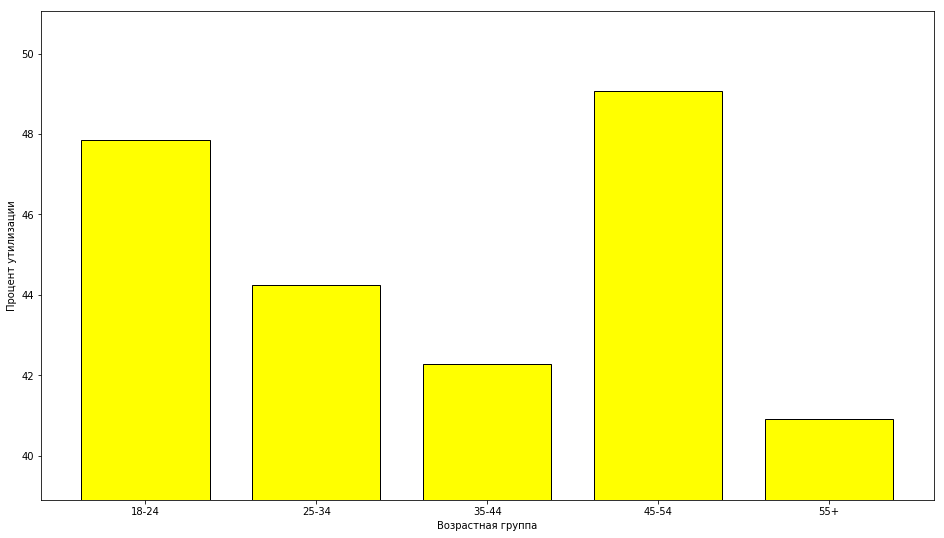

In [18]:
util_min = data['Процент утилизации'].min()
util_max = data['Процент утилизации'].max()

plt.figure(figsize = (16,9))

plt.bar(data['Возраст'] , data['Процент утилизации'], color = 'yellow', edgecolor = 'black', width=0.75,
        align='center')

plt.ylim(util_min-2, util_max+2)
plt.xlabel('Возрастная группа')
plt.ylabel('Процент утилизации')